In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load 
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data = pd.read_csv(mouse_drug_data_to_load)
trial_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset, and rename the columns
data = trial_data.merge(mouse_data, on="Mouse ID", sort=True)
data.columns = ['Mouse_ID', 'Timepoint', 'Tumor_Volume_mm3', 'Metastatic_Sites', 'Drug']

# Subset to drugs pertinent to assignment.
drugs = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']
data = data[data.Drug.isin(drugs)]

# Display the data table for preview
data

,Mouse_ID,Timepoint,Tumor_Volume_mm3,Metastatic_Sites,Drug
0,a203,0,45.000000,0,Infubinol
1,a203,5,48.508468,0,Infubinol
2,a203,10,51.852437,1,Infubinol
3,a203,15,52.777870,1,Infubinol
4,a203,20,55.173336,1,Infubinol
...,...,...,...,...,...
1881,z581,25,54.316407,2,Infubinol
1882,z581,30,56.286750,2,Infubinol
1883,z581,35,58.628399,3,Infubinol
1884,z581,40,60.053740,3,Infubinol


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
drug_group = data.groupby(["Drug", "Timepoint"])
mean_by_drug_and_time = drug_group.mean()

# Convert to DataFrame
mean_by_DT = pd.DataFrame(mean_by_drug_and_time).reset_index()

# # Subset to drugs pertinent to assignment.
# drugs = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']
# mean_by_DT = mean_by_DT[mean_by_DT.Drug.isin(drugs)]

# Preview DataFrame
mean_by_DT

,Drug,Timepoint,Tumor_Volume_mm3,Metastatic_Sites
0,Capomulin,0,45.000000,0.000000
1,Capomulin,5,44.266086,0.160000
2,Capomulin,10,43.084291,0.320000
3,Capomulin,15,42.064317,0.375000
4,Capomulin,20,40.716325,0.652174
5,Capomulin,25,39.939528,0.818182
6,Capomulin,30,38.769339,1.090909
7,Capomulin,35,37.816839,1.181818
8,Capomulin,40,36.958001,1.380952
9,Capomulin,45,36.236114,1.476190


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
mean_by_DT_SEM = drug_group.sem()
# Convert to DataFrame
mean_by_DT_SEM = pd.DataFrame(mean_by_DT_SEM)
mean_by_DT_SEM.reset_index(inplace=True)
# Preview DataFrame
mean_by_DT_SEM

,Drug,Timepoint,Metastatic_Sites,Mouse_ID,Tumor_Volume_mm3
0,Capomulin,0,0.000000,NaN,0.000000
1,Capomulin,5,0.074833,NaN,0.448593
2,Capomulin,10,0.125433,NaN,0.702684
3,Capomulin,15,0.132048,NaN,0.838617
4,Capomulin,20,0.161621,NaN,0.909731
5,Capomulin,25,0.181818,NaN,0.881642
6,Capomulin,30,0.172944,NaN,0.934460
7,Capomulin,35,0.169496,NaN,1.052241
8,Capomulin,40,0.175610,NaN,1.223608
9,Capomulin,45,0.202591,NaN,1.223977


In [4]:
# Prepare formatting for plots.
formatting = {
    # Drug: [color: marker]
    'Capomulin':['red', 'o'], 
    'Infubinol':['blue', '^'], 
    'Ketapril':['green', 's'], 
    'Placebo':['black', 'd']
}

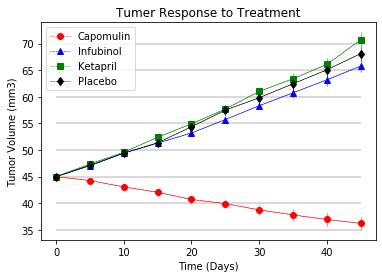

In [5]:
# Generate the Plot (with Error Bars)
for drug in drugs:
    x = mean_by_DT[mean_by_DT.Drug == drug].Timepoint
    y = mean_by_DT[mean_by_DT.Drug == drug].Tumor_Volume_mm3
    plt.plot(x, y,
             linewidth = 0.5,
             linestyle = '--',
             color = formatting[drug][0],
             marker = formatting[drug][1],
    )
    plt.errorbar(x, y, mean_by_DT_SEM[mean_by_DT_SEM['Drug'] == drug].Tumor_Volume_mm3, 
                 color = formatting[drug][0], linewidth = 0.5)
plt.legend(labels = drugs)
plt.xlabel('Time (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumer Response to Treatment')
plt.hlines(range(35, 75, 5), 0, 45, alpha=0.2)

## Metastatic Response to Treatment

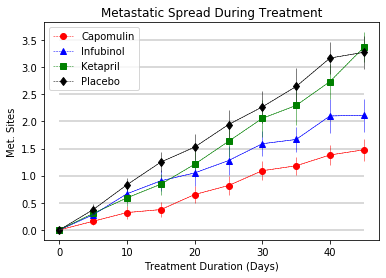

In [6]:
# Generate the Plot (with Error Bars)
for drug in drugs:
    x = mean_by_DT[mean_by_DT.Drug == drug].Timepoint
    y = mean_by_DT[mean_by_DT.Drug == drug].Metastatic_Sites
    plt.plot(x, y,
             linewidth = 0.5,
             linestyle = '--',
             color = formatting[drug][0],
             marker = formatting[drug][1],
    )
    plt.errorbar(x, y, mean_by_DT_SEM[mean_by_DT_SEM['Drug'] == drug].Metastatic_Sites, 
                 color = formatting[drug][0], linewidth = 0.5)
plt.legend(labels = drugs)
plt.xlabel('Treatment Duration (Days)')
plt.ylabel('Met. Sites')
plt.title('Metastatic Spread During Treatment')
plt.hlines(np.arange(0, 4, 0.5), 0, 45, alpha=0.2)

## Survival Rates

In [7]:
# Store the Count of Mice Grouped by Drug and Timepoint
count_by_drug_and_time = drug_group.count()
# Convert to DataFrame
count_by_DT = pd.DataFrame(count_by_drug_and_time).reset_index()
# count_by_DT = count_by_DT[count_by_DT.Drug.isin(drugs)]
# Preview DataFrame
count_by_DT

,Drug,Timepoint,Mouse_ID,Tumor_Volume_mm3,Metastatic_Sites
0,Capomulin,0,25,25,25
1,Capomulin,5,25,25,25
2,Capomulin,10,25,25,25
3,Capomulin,15,24,24,24
4,Capomulin,20,23,23,23
5,Capomulin,25,22,22,22
6,Capomulin,30,22,22,22
7,Capomulin,35,22,22,22
8,Capomulin,40,21,21,21
9,Capomulin,45,21,21,21


In [8]:
# Get inital count of mice per drug.
initial_count_by_drug = count_by_DT.groupby('Drug').Mouse_ID.first()
initial_count_by_drug

Drug
Capomulin    25
Infubinol    25
Ketapril     25
Placebo      25
Name: Mouse_ID, dtype: int64

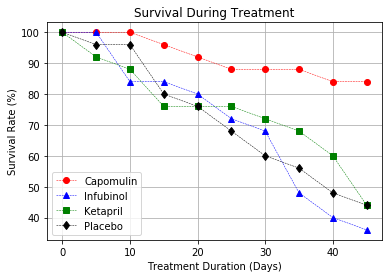

In [9]:
# Generate the Plot (Accounting for Percentages)
for drug in drugs:
    x = count_by_DT[count_by_DT.Drug == drug].Timepoint
    y = count_by_DT[count_by_DT.Drug == drug].Mouse_ID / initial_count_by_drug[drug]
    plt.plot(x, y,
             linewidth = 0.5,
             linestyle = '--',
             color = formatting[drug][0],
             marker = formatting[drug][1]
            )
#     plt.errorbar(x, y, tv_SEM)
plt.legend(labels = drugs)
plt.xlabel('Treatment Duration (Days)')
plt.ylabel('Survival Rate (%)')

"""
Note: For the yticks, I came up with the line below to do what I wanted, 
but it feels like a hack.  I found documentation on PercentFormatter
(https://matplotlib.org/api/ticker_api.html#matplotlib.ticker.PercentFormatter)
but the class hasn't focused much on operations on axes, only single plots, 
so I wasn't sure how to integrate the code there into this plot.
"""
plt.yticks(np.arange(0.4, 1.1 , .1), [str(x) for x in range(40, 110, 10)])
plt.title('Survival During Treatment')
plt.grid()

## Summary Bar Graph

In [10]:
# Calculate the percent changes for each drug
TV_first_and_last = {}

for drug in drugs:
    TV_first_and_last[drug] = mean_by_DT[mean_by_DT.Drug == drug].sort_values('Timepoint').Tumor_Volume_mm3.iloc[[0, -1]].tolist()

TV_percent_change = []
for drug in drugs:
    TV_percent_change.append(
        round((TV_first_and_last[drug][1] - TV_first_and_last[drug][0]) / TV_first_and_last[drug][0], 2)
    )

TVpc_dict = {'Drug': drugs, 'Percent_Change': TV_percent_change}
TVpc_df = pd.DataFrame(TVpc_dict)

# Display the data to confirm
TVpc_df

,Drug,Percent_Change
0,Capomulin,-0.19
1,Infubinol,0.46
2,Ketapril,0.57
3,Placebo,0.51


[Text(-0.12, -0.17, '-19%'),
 Text(0.88, 0.48000000000000004, '46%'),
 Text(1.88, 0.59, '57%'),
 Text(2.88, 0.53, '51%')]

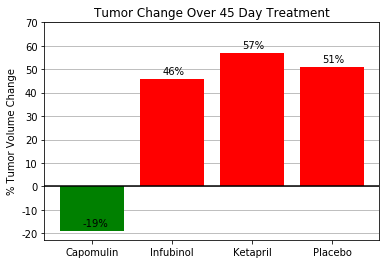

In [11]:
# Generate the Plot
plt.bar(TVpc_df.Drug, TVpc_df.Percent_Change, 
        color=(TVpc_df.Percent_Change > 0).map({True: 'red',False: 'green'}), zorder=2)
plt.title('Tumor Change Over 45 Day Treatment')
plt.grid(zorder=0, axis='y')
plt.axhline(color='black')
plt.ylabel('% Tumor Volume Change')
plt.yticks(np.arange(-0.2, 0.8 , .1), [str(x) for x in range(-20, 80, 10)])
[plt.text(x - 0.12, y + 0.02, f'{round(y*100)}%') for x, y in zip(range(4), TV_percent_change)]

## Observations
Capomulin is the most effective drug studied.
1. It was the only drug which yielded a reduction in tumor volume, specifically a decrease of 10 cubic millimeters compared to the other drugs' increases of 20 cubic millimeters or more.
1. It was the drug with the least metastatic spread over 45 days.
1. It was the drug associated with the highest survival rate, having more than 80% of rats treated die in 45 days, compared to less than half of rats on other drugs surviving the 45 days.